PERT Table:
+---------------+------------------+-------------------+-------------------+----------------------+-----------------+
|   Activity ID |   Optimistic (O) |   Most Likely (M) |   Pessimistic (P) |   Expected Time (TE) |   Variance (σ²) |
+===============+==================+===================+===================+======================+=================+
|             1 |                0 |                 0 |                 0 |                 0    |            0    |
+---------------+------------------+-------------------+-------------------+----------------------+-----------------+
|             2 |               10 |                15 |                20 |                15    |            2.78 |
+---------------+------------------+-------------------+-------------------+----------------------+-----------------+
|             3 |                7 |                10 |                14 |                10.17 |            1.36 |
+---------------+------------------+--------

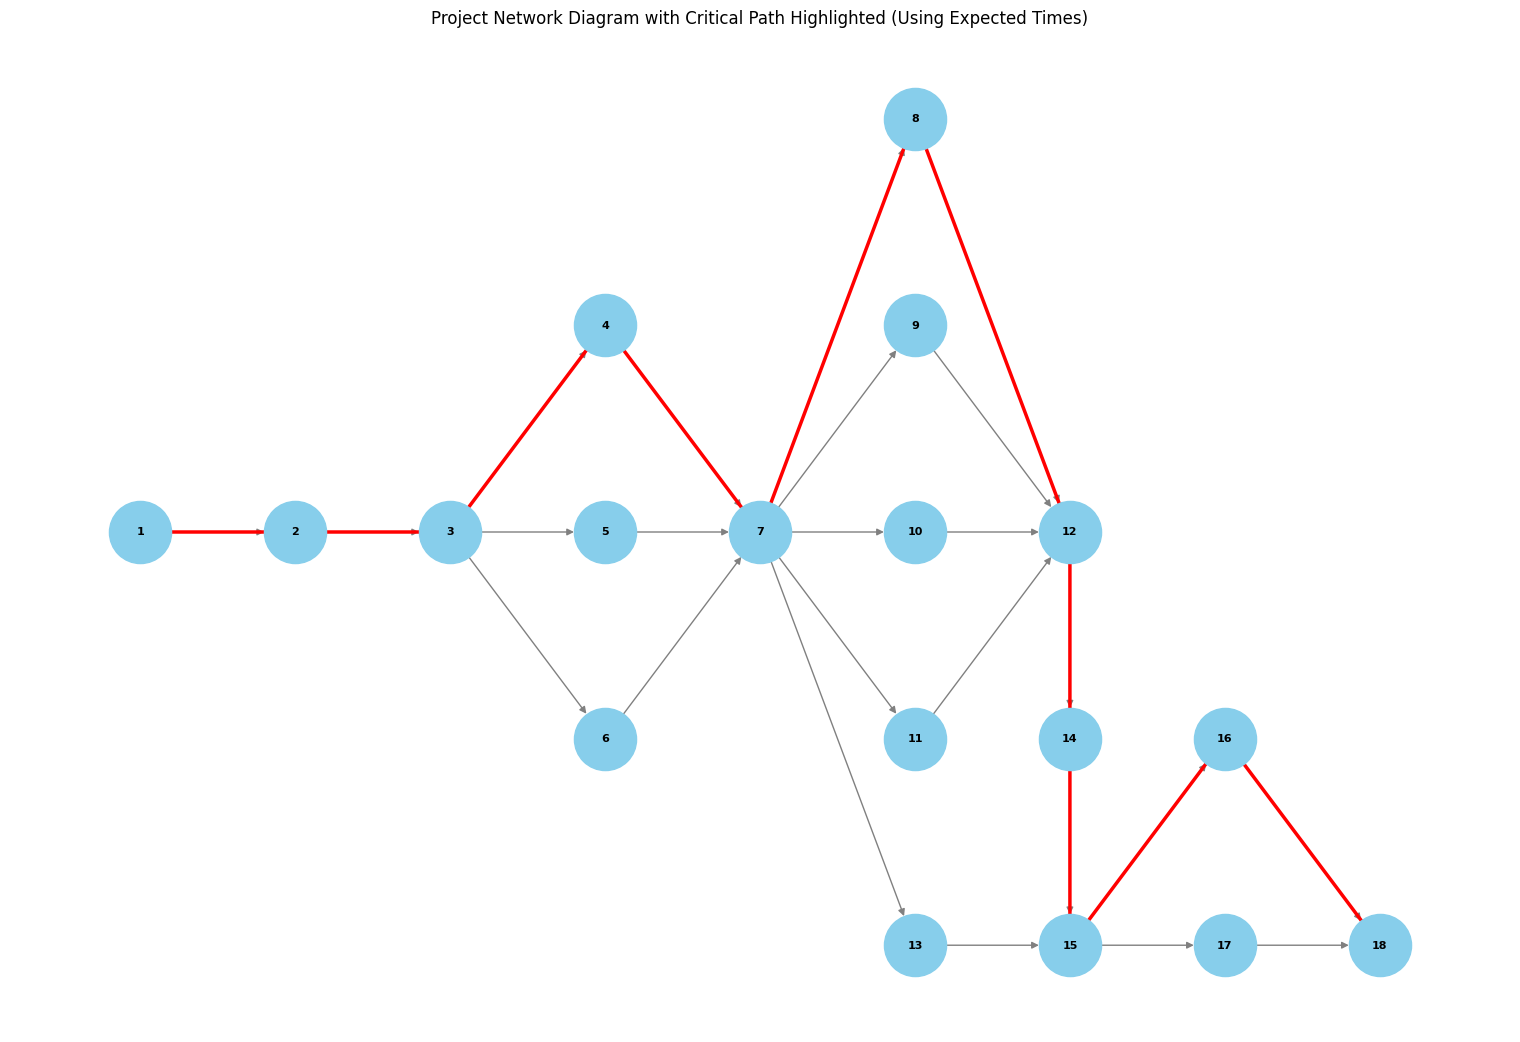

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

# Data for activities
activities = [
    {"id": 1, "desc": "Project Initiation and Planning", "to": 0, "tm": 0, "tp": 0, "predecessors": []},
    {"id": 2, "desc": "Public Approval Process Management", "to": 10, "tm": 15, "tp": 20, "predecessors": [1]},
    {"id": 3, "desc": "Feasibility Study and Risk Assessment", "to": 7, "tm": 10, "tp": 14, "predecessors": [2]},
    {"id": 4, "desc": "IoT Deployment Planning and Design", "to": 8, "tm": 12, "tp": 16, "predecessors": [3]},
    {"id": 5, "desc": "Smart Grid Infrastructure Planning", "to": 7, "tm": 10, "tp": 14, "predecessors": [3]},
    {"id": 6, "desc": "Waste Management System Design", "to": 7, "tm": 11, "tp": 15, "predecessors": [3]},
    {"id": 7, "desc": "Technology Integration Testing", "to": 6, "tm": 9, "tp": 12, "predecessors": [4, 5, 6]},
    {"id": 8, "desc": "Infrastructure Development", "to": 15, "tm": 20, "tp": 25, "predecessors": [7]},
    {"id": 9, "desc": "Data Integration and Management Setup", "to": 10, "tm": 14, "tp": 18, "predecessors": [7]},
    {"id": 10, "desc": "Training and Capacity Building", "to": 8, "tm": 10, "tp": 12, "predecessors": [7]},
    {"id": 11, "desc": "Cybersecurity and Data Privacy Setup", "to": 5, "tm": 7, "tp": 10, "predecessors": [7]},
    {"id": 12, "desc": "Pilot Testing and Quality Control", "to": 10, "tm": 14, "tp": 18, "predecessors": [8, 9, 10, 11]},
    {"id": 13, "desc": "Public Awareness Campaigns", "to": 7, "tm": 10, "tp": 14, "predecessors": [7]},
    {"id": 14, "desc": "System Optimization and Fine-Tuning", "to": 7, "tm": 10, "tp": 14, "predecessors": [12]},
    {"id": 15, "desc": "Final Integration and Full Deployment", "to": 10, "tm": 14, "tp": 18, "predecessors": [13, 14]},
    {"id": 16, "desc": "Performance Monitoring and Maintenance", "to": 7, "tm": 10, "tp": 12, "predecessors": [15]},
    {"id": 17, "desc": "Sustainability and Scalability Planning", "to": 6, "tm": 8, "tp": 10, "predecessors": [15]},
    {"id": 18, "desc": "Project Closure and Evaluation", "to": 5, "tm": 7, "tp": 10, "predecessors": [16, 17]}
]

# Create directed graph
G = nx.DiGraph()

# Add nodes with PERT duration
for activity in activities:
    pert_time = (activity["to"] + 4 * activity["tm"] + activity["tp"]) / 6
    G.add_node(activity["id"], desc=activity["desc"], duration=pert_time)

# Add edges based on predecessors
for activity in activities:
    for pred in activity["predecessors"]:
        G.add_edge(pred, activity["id"])

# Add dotted edge between 2 and 3
G.add_edge(2, 3, style="dotted")

# Create a PERT table with Expected Time and Variance
pert_table = []
for activity in activities:
    O = activity["to"]
    M = activity["tm"]
    P = activity["tp"]
    TE = (O + 4 * M + P) / 6  # Expected time
    variance = ((P - O) / 6) ** 2  # Variance
    pert_table.append({
        "Activity ID": activity["id"],
        "Optimistic (O)": O,
        "Most Likely (M)": M,
        "Pessimistic (P)": P,
        "Expected Time (TE)": round(TE, 2),
        "Variance (σ²)": round(variance, 2)
    })

# Display the PERT table using tabulate
print("PERT Table:")
print(tabulate(pert_table, headers="keys", tablefmt="grid"))

# Update node attributes with the calculated TE
for activity in activities:
    TE = (activity["to"] + 4 * activity["tm"] + activity["tp"]) / 6
    G.nodes[activity["id"]]["duration"] = TE

# Recalculate the critical path using the expected times (TE)
cp = nx.dag_longest_path(G, weight="duration")
cp_edges = list(zip(cp, cp[1:]))
project_duration = sum(nx.get_node_attributes(G, "duration")[node] for node in cp)

# Print critical path and project duration
print("\nCritical Path:", cp)
print("Project Duration (Months):", round(project_duration, 2))

# Manually set positions with more space between nodes
pos = {
    1: (0, 0), 2: (2, 0), 3: (4, 0), 4: (6, 2), 5: (6, 0), 6: (6, -2), 7: (8, 0),
    8: (10, 4), 9: (10, 2), 10: (10, 0), 11: (10, -2), 12: (12, 0), 13: (10, -4),
    14: (12, -2), 15: (12, -4), 16: (14, -2), 17: (14, -4), 18: (16, -4)
}

# Draw network diagram with critical path highlighted
plt.figure(figsize=(15, 10))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color="skyblue",
    font_size=8,
    font_weight="bold",
    edge_color="gray",
)

# Highlight the critical path
nx.draw_networkx_edges(G, pos, edgelist=cp_edges, edge_color="red", width=2.5)

# Highlight the dotted edge
#dotted_edge = [(2, 3)]
#nx.draw_networkx_edges(G, pos, edgelist=dotted_edge, edge_color="black", style="dotted", width=2)

plt.title("Project Network Diagram with Critical Path Highlighted (Using Expected Times)")
plt.show()

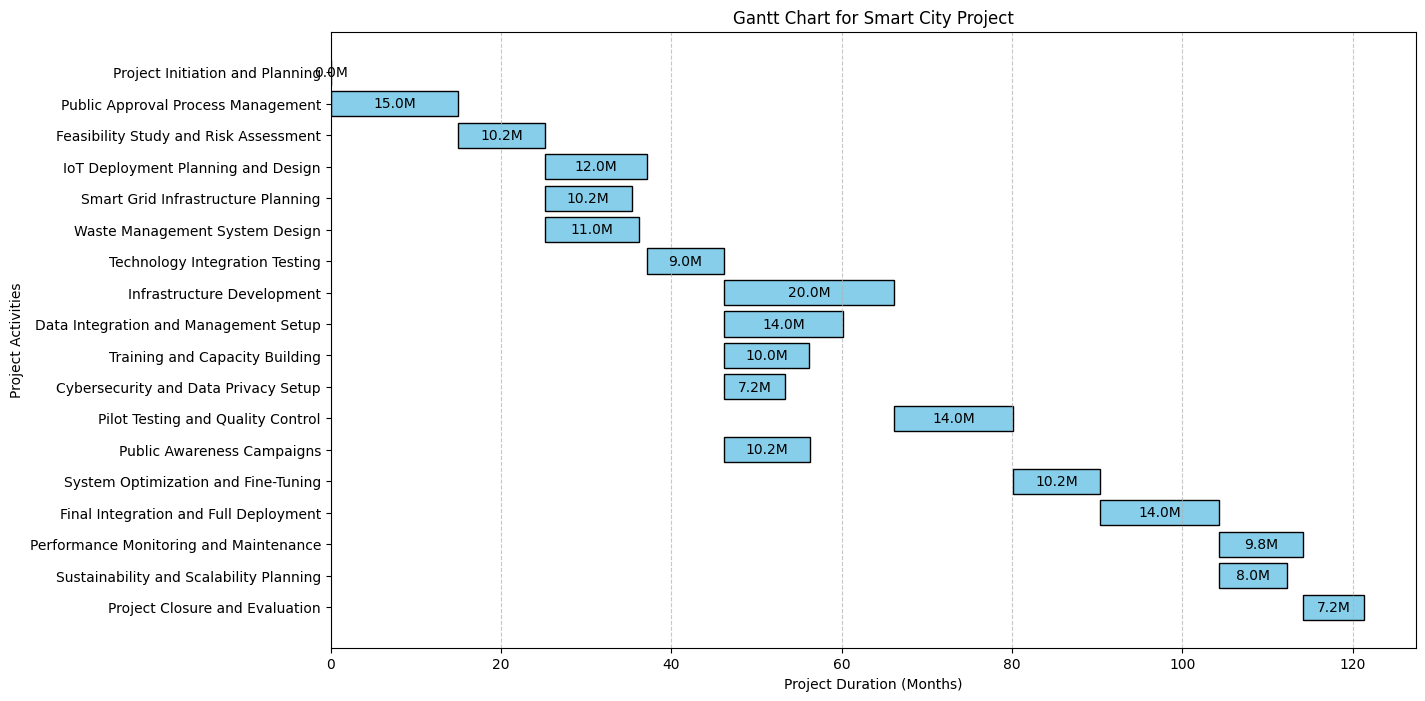

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define activities
activities = [
    {"id": 1, "desc": "Project Initiation and Planning", "to": 0, "tm": 0, "tp": 0, "predecessors": []},
    {"id": 2, "desc": "Public Approval Process Management", "to": 10, "tm": 15, "tp": 20, "predecessors": [1]},
    {"id": 3, "desc": "Feasibility Study and Risk Assessment", "to": 7, "tm": 10, "tp": 14, "predecessors": [2]},
    {"id": 4, "desc": "IoT Deployment Planning and Design", "to": 8, "tm": 12, "tp": 16, "predecessors": [3]},
    {"id": 5, "desc": "Smart Grid Infrastructure Planning", "to": 7, "tm": 10, "tp": 14, "predecessors": [3]},
    {"id": 6, "desc": "Waste Management System Design", "to": 7, "tm": 11, "tp": 15, "predecessors": [3]},
    {"id": 7, "desc": "Technology Integration Testing", "to": 6, "tm": 9, "tp": 12, "predecessors": [4, 5, 6]},
    {"id": 8, "desc": "Infrastructure Development", "to": 15, "tm": 20, "tp": 25, "predecessors": [7]},
    {"id": 9, "desc": "Data Integration and Management Setup", "to": 10, "tm": 14, "tp": 18, "predecessors": [7]},
    {"id": 10, "desc": "Training and Capacity Building", "to": 8, "tm": 10, "tp": 12, "predecessors": [7]},
    {"id": 11, "desc": "Cybersecurity and Data Privacy Setup", "to": 5, "tm": 7, "tp": 10, "predecessors": [7]},
    {"id": 12, "desc": "Pilot Testing and Quality Control", "to": 10, "tm": 14, "tp": 18, "predecessors": [8, 9, 10, 11]},
    {"id": 13, "desc": "Public Awareness Campaigns", "to": 7, "tm": 10, "tp": 14, "predecessors": [7]},
    {"id": 14, "desc": "System Optimization and Fine-Tuning", "to": 7, "tm": 10, "tp": 14, "predecessors": [12]},
    {"id": 15, "desc": "Final Integration and Full Deployment", "to": 10, "tm": 14, "tp": 18, "predecessors": [13, 14]},
    {"id": 16, "desc": "Performance Monitoring and Maintenance", "to": 7, "tm": 10, "tp": 12, "predecessors": [15]},
    {"id": 17, "desc": "Sustainability and Scalability Planning", "to": 6, "tm": 8, "tp": 10, "predecessors": [15]},
    {"id": 18, "desc": "Project Closure and Evaluation", "to": 5, "tm": 7, "tp": 10, "predecessors": [16, 17]},
]

# Calculate expected durations (TE) using PERT formula
expected_times = {a["id"]: (a["to"] + 4 * a["tm"] + a["tp"]) / 6 for a in activities}

# Calculate start times based on dependencies
start_times = {}
for activity in activities:
    if not activity["predecessors"]:
        start_times[activity["id"]] = 0  # Start immediately if no predecessors
    else:
        start_times[activity["id"]] = max(start_times[pred] + expected_times[pred] for pred in activity["predecessors"])

# Extract data for plotting
activity_ids = [a["id"] for a in activities]
activity_desc = [a["desc"] for a in activities]
start_list = [start_times[a] for a in activity_ids]
duration_list = [expected_times[a] for a in activity_ids]

# Generate Gantt Chart
fig, ax = plt.subplots(figsize=(14, 8))
y_pos = np.arange(len(activity_ids))

# Plot bars for each activity
ax.barh(y_pos, duration_list, left=start_list, color="skyblue", edgecolor="black")

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(activity_desc)
ax.set_xlabel("Project Duration (Months)")
ax.set_ylabel("Project Activities")
ax.set_title("Gantt Chart for Smart City Project")

# Annotate durations on bars
for i, (start, duration) in enumerate(zip(start_list, duration_list)):
    ax.text(start + duration / 2, i, f"{round(duration, 1)}M", va="center", ha="center", color="black", fontsize=10)

# Format the plot
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()